In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy

from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold,GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
gas=pd.read_csv("/content/sample_data/gas_turbines.csv")
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gas.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


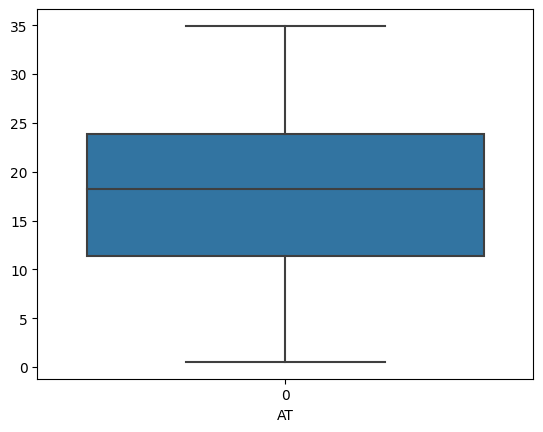

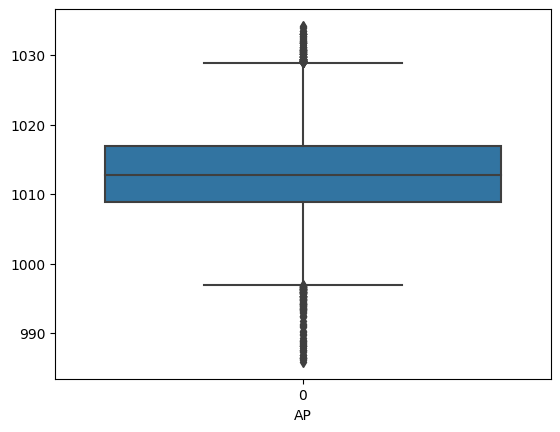

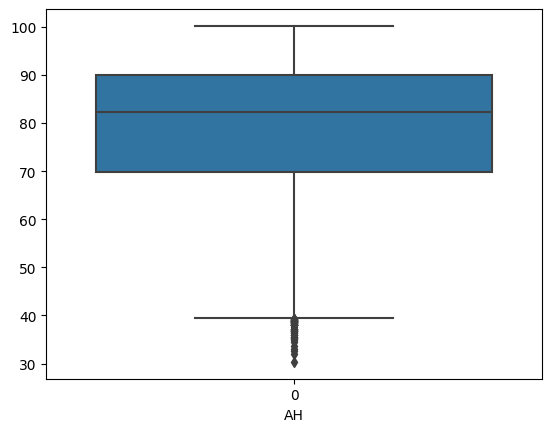

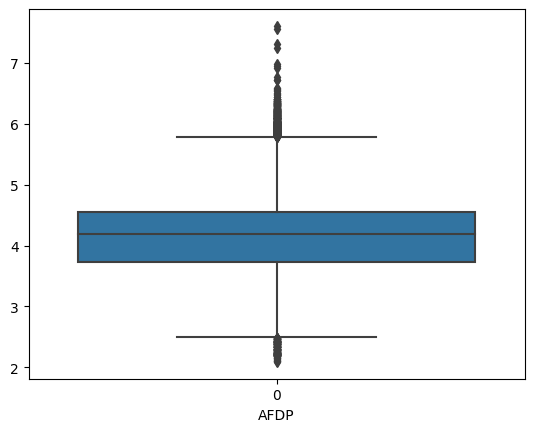

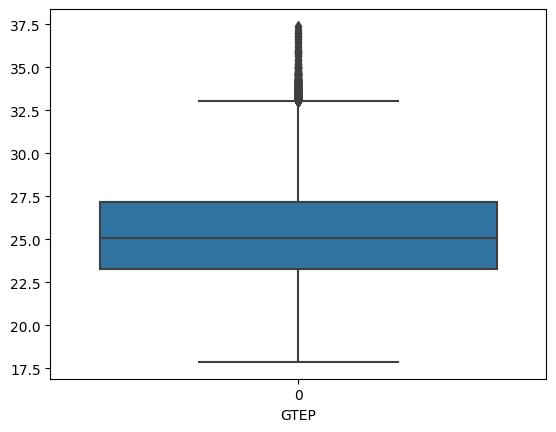

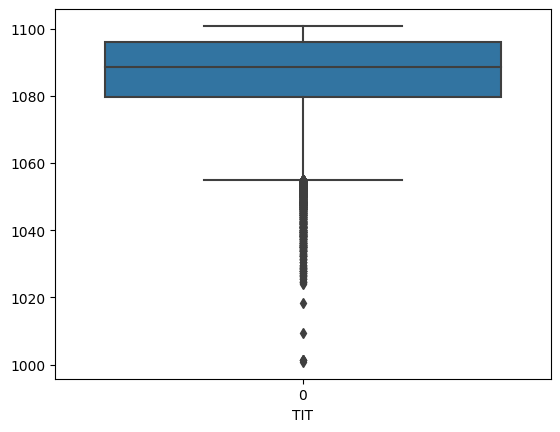

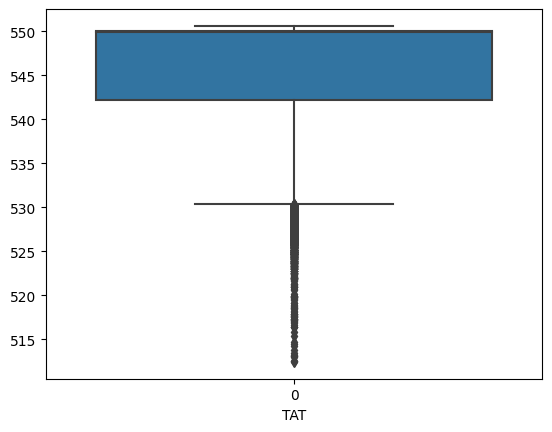

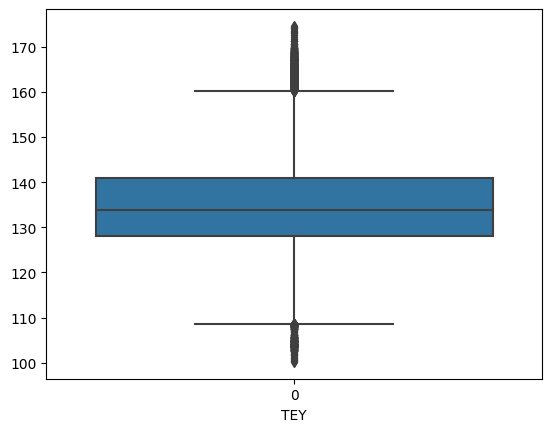

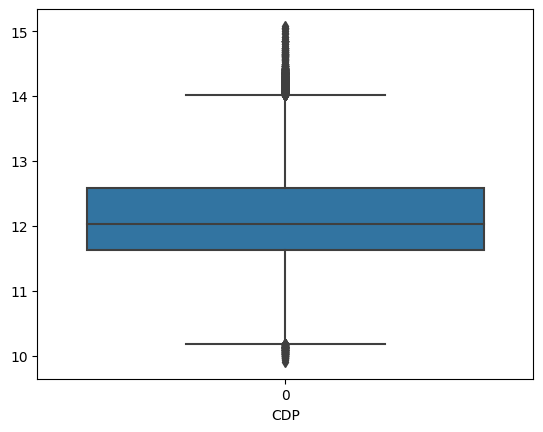

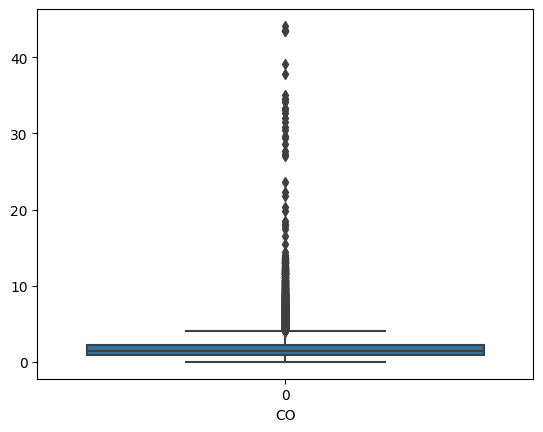

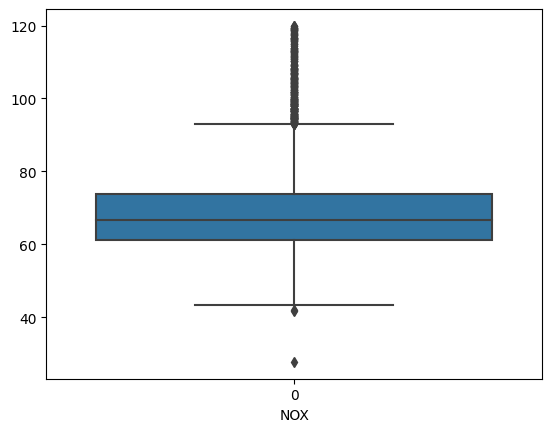

In [5]:
for i in gas.columns:
  sns.boxplot(gas[i])
  plt.xlabel(i)
  plt.show()

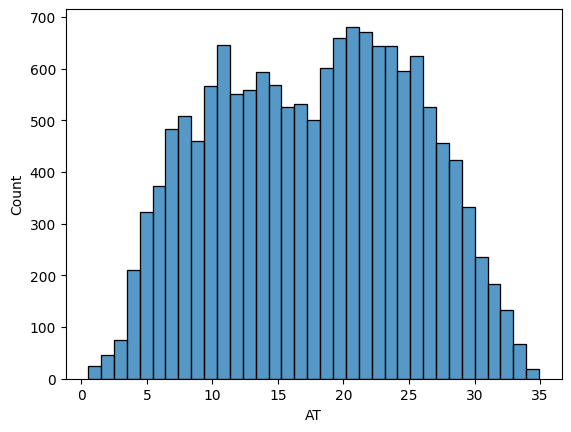

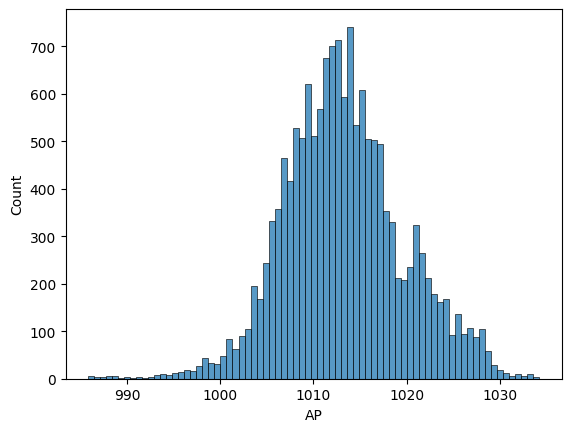

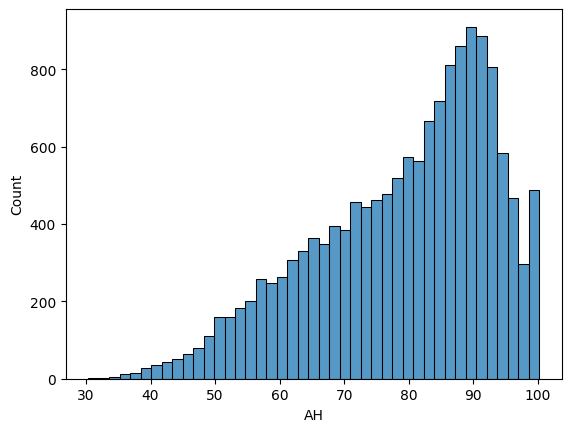

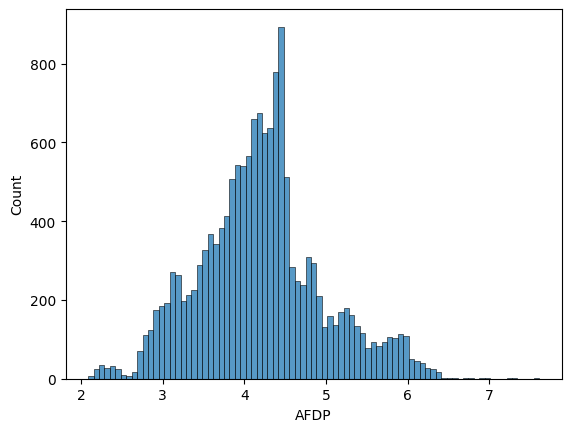

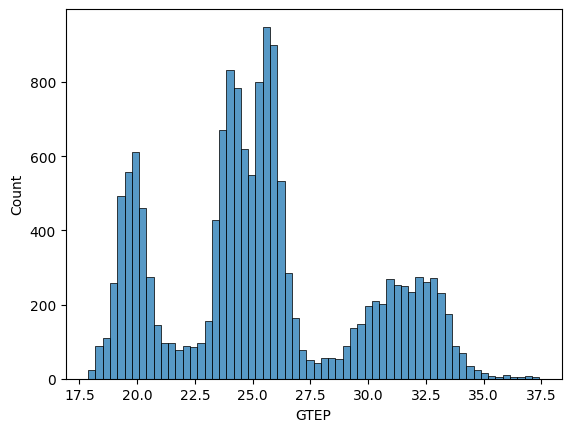

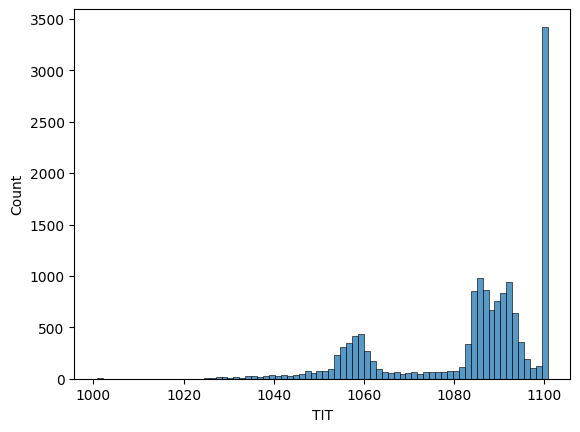

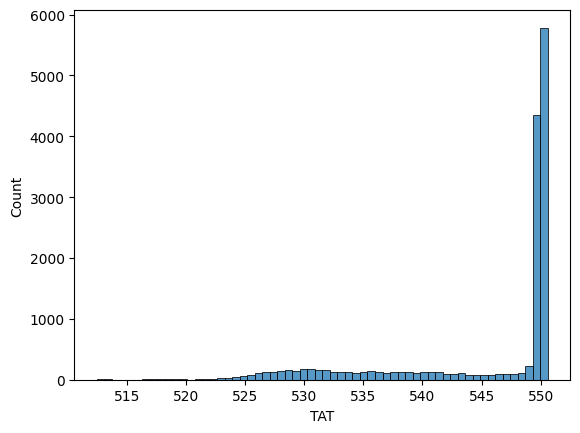

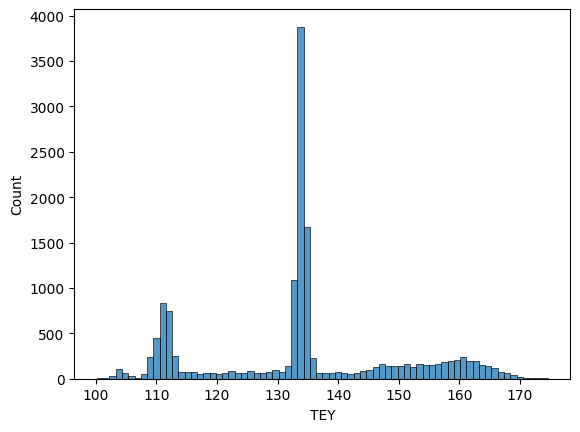

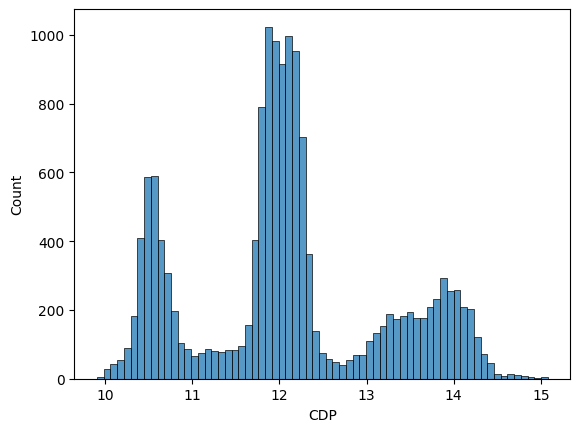

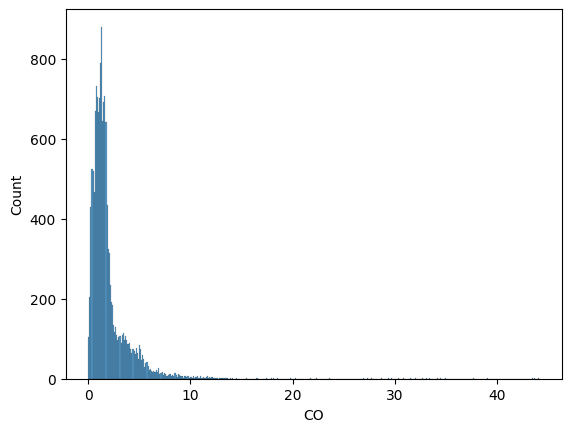

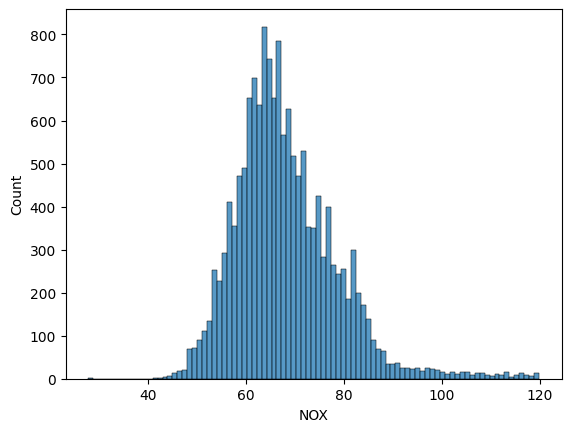

In [6]:
for i in gas.columns:
  sns.histplot(gas[i])
  plt.xlabel(i)
  plt.show()

In [7]:
print(gas[gas.duplicated])

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []


In [8]:
print(gas.isna().sum())

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


<Axes: xlabel='TEY', ylabel='Density'>

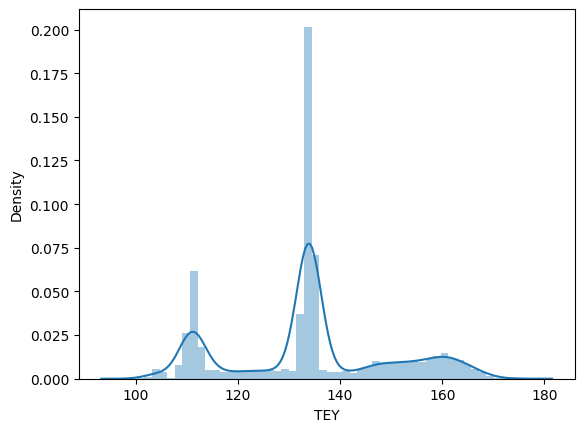

In [9]:
sns.distplot(gas['TEY'])

<Axes: xlabel='TEY', ylabel='Count'>

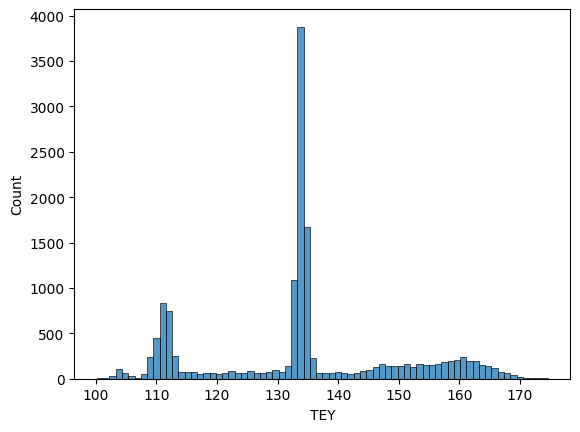

In [10]:
sns.histplot(gas['TEY'])

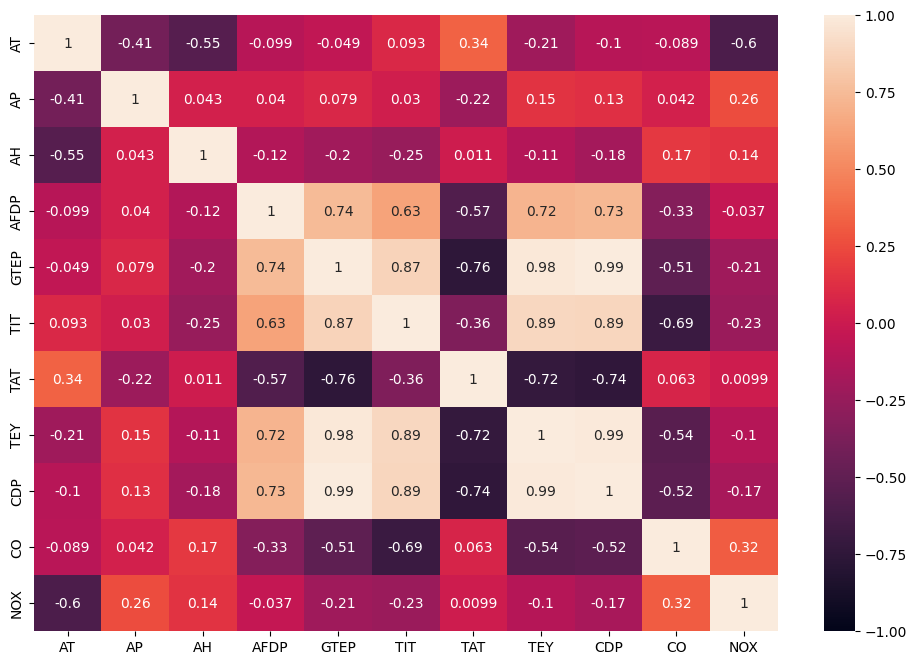

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(gas.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

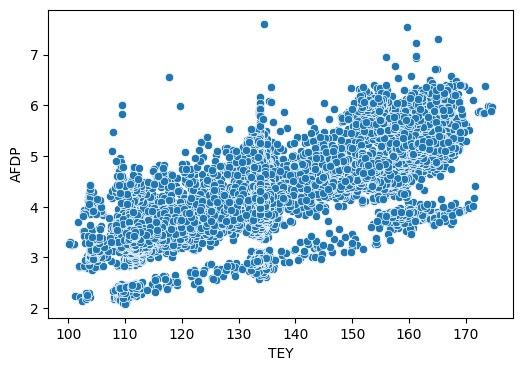

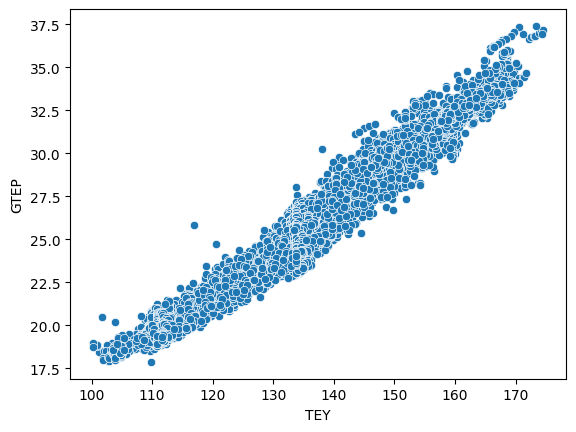

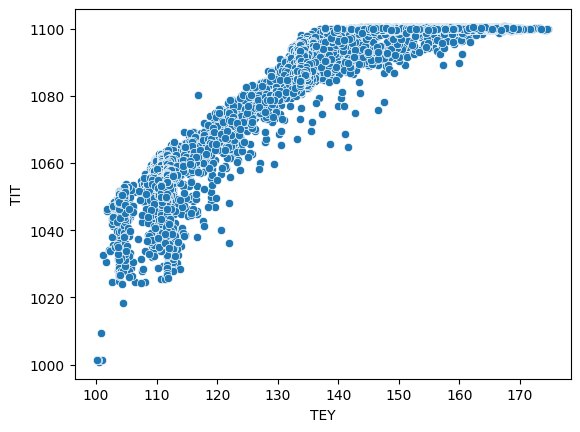

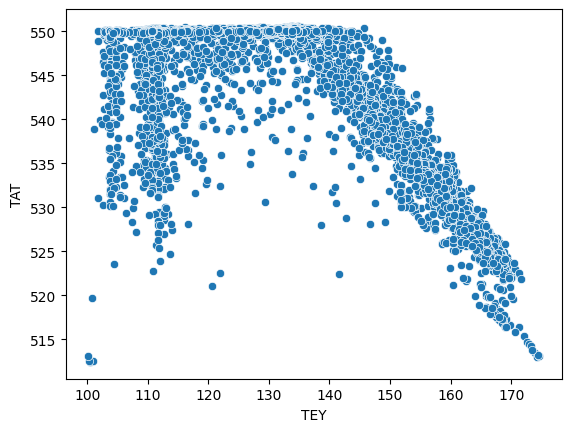

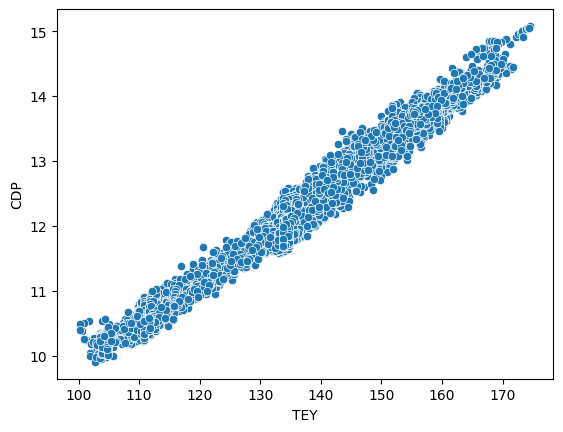

In [12]:
scat=['AFDP','GTEP','TIT','TAT','CDP']
plt.figure(figsize=(6,4))
for i in scat:
  sns.scatterplot(data=gas, x="TEY", y=i)
  plt.show()

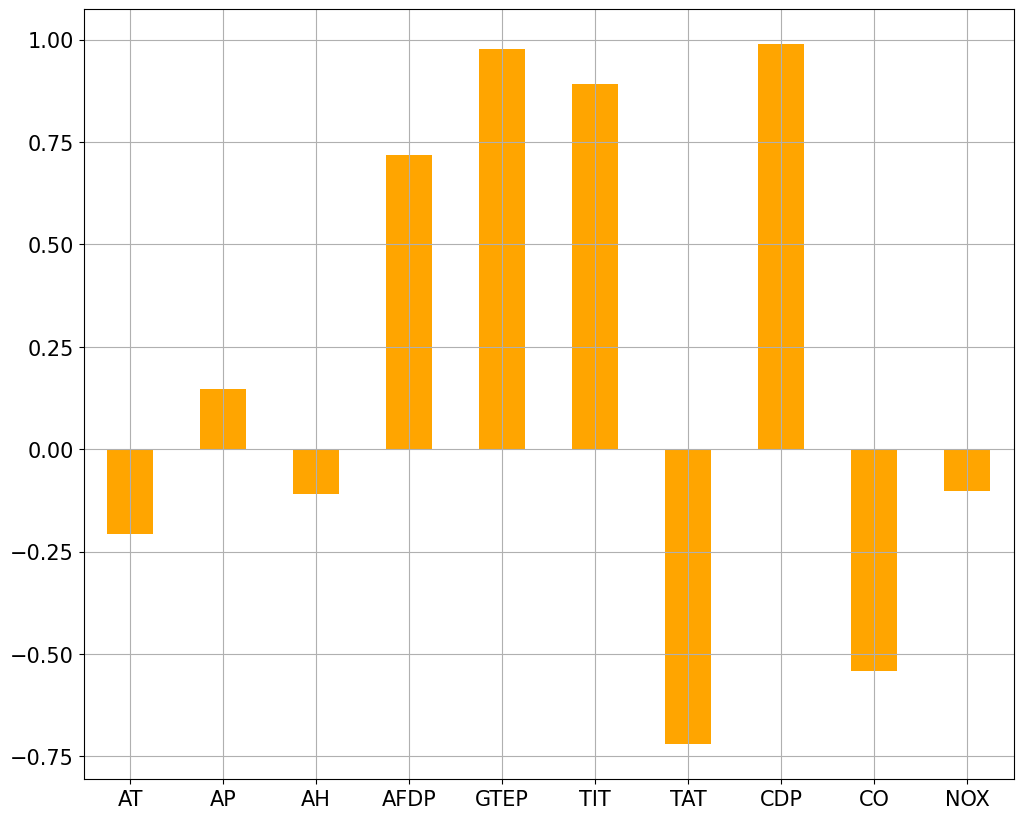

In [13]:
plt.figure(figsize=(4,4))
data=gas.copy()
correlation=data.corrwith(gas['TEY'])
correlation=correlation[correlation!=1]
pos_corr=correlation[correlation>0].sort_values(ascending=False)
neg_corr=correlation[correlation<0].sort_values(ascending=False)
correlation.plot.bar(figsize=(12,10), fontsize = 15, color = 'orange', rot = 0, grid = True)
plt.show()

LETS START ANN MODEL

In [14]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [15]:
x=gas.drop('TEY',axis=1)
y=gas[['TEY']]

In [16]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [17]:
x_st=StandardScaler().fit_transform(x)

In [18]:
x_st

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_st,y,test_size=0.3,random_state=3)

In [20]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 10)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , activation = 'sigmoid' )) # o/p layer

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.fit(x_train, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)
score = model.evaluate(x_train, y_train, verbose=0)

Epoch 1/100
148/148 [==============================] - 1s 3ms/step - loss: 18021.7715 - accuracy: 0.0000e+00 - val_loss: 17973.7598 - val_accuracy: 0.0000e+00
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 17992.6133 - accuracy: 0.0000e+00 - val_loss: 17972.8574 - val_accuracy: 0.0000e+00
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 17992.1914 - accuracy: 0.0000e+00 - val_loss: 17972.6562 - val_accuracy: 0.0000e+00
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 17992.0645 - accuracy: 0.0000e+00 - val_loss: 17972.5820 - val_accuracy: 0.0000e+00
Epoch 5/100
148/148 [==============================] - 0s 1ms/step - loss: 17992.0078 - accuracy: 0.0000e+00 - val_loss: 17972.5391 - val_accuracy: 0.0000e+00
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 17991.9727 - accuracy: 0.0000e+00 - val_loss: 17972.5176 - val_accuracy: 0.0000e+00
Epoch 7/100
148/148 [=========================

In [21]:
score

[17986.0546875, 0.0]

In [22]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train, y_train, x_test, y_test)
finalParamTable

141/141 [==============================] - 0s 781us/step
batch_size: 5 - epochs: 5 Accuracy: TEY    95.418985
dtype: float64
141/141 [==============================] - 0s 789us/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.559119
dtype: float64
141/141 [==============================] - 0s 819us/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.712392
dtype: float64
141/141 [==============================] - 0s 804us/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.713356
dtype: float64
141/141 [==============================] - 0s 981us/step
batch_size: 10 - epochs: 5 Accuracy: TEY    73.009779
dtype: float64
141/141 [==============================] - 0s 811us/step
batch_size: 10 - epochs: 10 Accuracy: TEY    96.344524
dtype: float64
141/141 [==============================] - 0s 755us/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.661826
dtype: float64
141/141 [==============================] - 0s 829us/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.722955
dty

,batchsize,epochs,Accuracy
0,5,5,TEY 95.418985 dtype: float64
0,5,10,TEY 99.559119 dtype: float64
0,5,50,TEY 99.712392 dtype: float64
0,5,100,TEY 99.713356 dtype: float64
0,10,5,TEY 73.009779 dtype: float64
0,10,10,TEY 96.344524 dtype: float64
0,10,50,TEY 99.661826 dtype: float64
0,10,100,TEY 99.722955 dtype: float64
0,15,5,TEY 52.35371 dtype: float64
0,15,10,TEY 86.729496 dtype: float64


*batchsize:10*	   epochs: 100	    *Target:TEY*      Accuracy:99.722955     dtype: float64

In [24]:
from keras.layers import Dropout
def toFindBestParams(x_train, y_train, x_test, y_test):

    #defining list of hyperparameters
    learning_rate = [0.001]
    dropout_rate = [0.0,0.1,0.2]
    bestParamTable = pd.DataFrame()

    for lr in learning_rate:
        for dr in dropout_rate:
            model = Sequential()
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dropout(dr))
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
            model.add(Dropout(dr))
            model.add(Dense(1, kernel_initializer='normal'))
            adam=Adam(lr=lr)
            model.compile(optimizer =adam, loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train, y_train , batch_size=10, epochs=100,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[lr, dr, 100-MAPE]],
                                                        columns=['learning rate','dropout','Accuracy'] ))

            # printing the results of the current iteration
            print('learning rate:', lr,'-', 'dropout:',dr, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train, y_train, x_test, y_test)
finalParamTable

141/141 [==============================] - 0s 830us/step
learning rate: 0.001 - dropout: 0.0 Accuracy: TEY    99.704963
dtype: float64
141/141 [==============================] - 0s 796us/step
learning rate: 0.001 - dropout: 0.1 Accuracy: TEY    98.943926
dtype: float64
141/141 [==============================] - 0s 806us/step
learning rate: 0.001 - dropout: 0.2 Accuracy: TEY    98.801823
dtype: float64


,learning rate,dropout,Accuracy
0,0.001,0.0,TEY 99.704963 dtype: float64
0,0.001,0.1,TEY 98.943926 dtype: float64
0,0.001,0.2,TEY 98.801823 dtype: float64


In [25]:
#final model
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
model.add(Dropout(0.0))
model.add(Dense(1, kernel_initializer='normal'))
adam=Adam(0.001)
model.compile(optimizer =adam, loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
model.fit(x_train, y_train , batch_size=5, epochs=100,  verbose=0)

  #MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test))/y_test))






In [26]:
y_pred=model.predict(x_test)

141/141 [==============================] - 0s 868us/step


In [27]:
y_pred

array([[164.1441 ],
       [133.37787],
       [163.58514],
       ...,
       [111.60828],
       [109.69341],
       [133.83856]], dtype=float32)

In [28]:
y_test

,TEY
8185,164.34
8994,133.67
8944,163.41
3451,109.78
8236,135.01
...,...
4964,133.78
9159,137.00
12903,111.53
6025,109.77


In [29]:
Y_pred=model.predict(x_train)

329/329 [==============================] - 0s 803us/step


In [30]:
Y_pred

array([[136.30661],
       [134.09349],
       [133.79845],
       ...,
       [133.36092],
       [141.86055],
       [134.33237]], dtype=float32)

In [31]:
y_train

,TEY
13383,135.92
13172,133.87
8356,133.66
2683,154.48
3266,133.82
...,...
9160,155.62
9859,156.74
11513,133.70
1688,142.06


In [32]:
y_pred=model.predict(x_st)

470/470 [==============================] - 0s 809us/step


In [33]:
y_pred


array([[114.81903 ],
       [114.927666],
       [115.13163 ],
       ...,
       [110.5319  ],
       [111.42231 ],
       [112.129005]], dtype=float32)

In [36]:
gas['predicted']=y_pred
gas['actual']=gas['TEY']


In [37]:
gas.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,predicted,actual
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722,114.819031,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776,114.927666,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468,115.131630,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670,115.164223,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311,115.221481,114.72


In [42]:
gas['error']=gas['predicted']-gas['actual']
gas['error']

0        0.119031
1        0.207666
2        0.421630
3        0.444223
4        0.501481
           ...   
15034   -0.136192
15035   -0.074151
15036    0.341898
15037    0.682310
15038    0.549005
Name: error, Length: 15039, dtype: float64

In [51]:
gas.to_csv("gasTurbine_modelOutPut.csv")

In [43]:
gas.error.mean()

-0.020192341586679315

In [44]:
gas.error.std()

0.4762423849466719

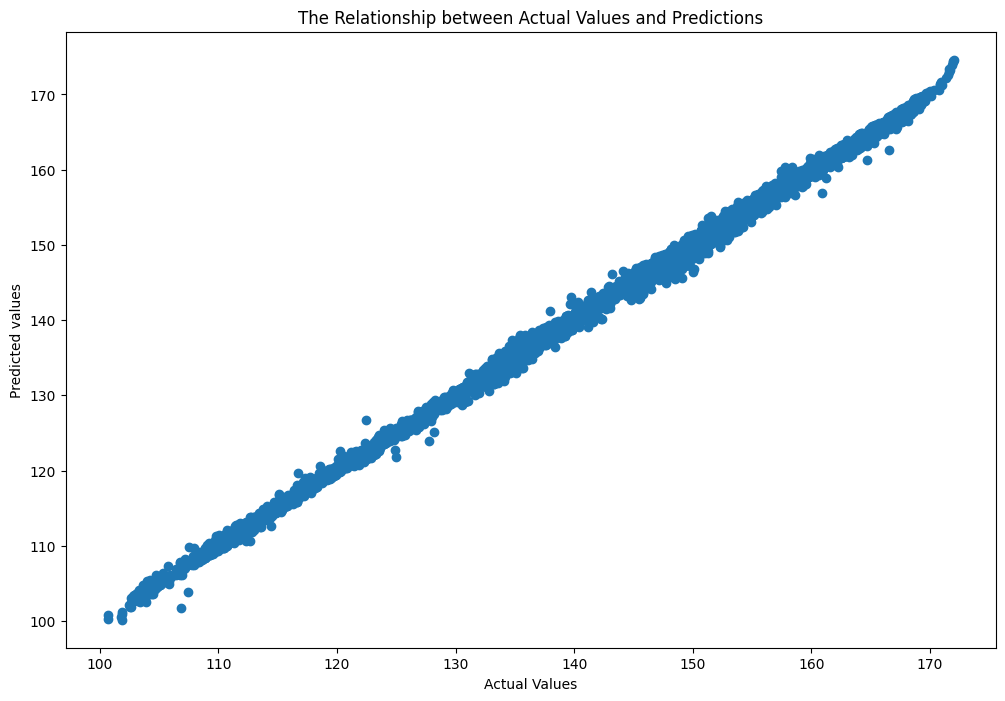

In [45]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Relationship between Actual Values and Predictions")
plt.scatter(gas['predicted'],gas['actual'])

Text(0.5, 0, 'residuals')

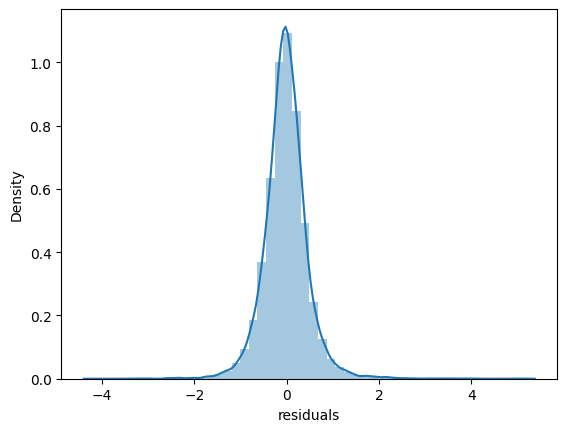

In [49]:
sns.distplot(gas.error)
plt.xlabel('residuals')
plt.show()